In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

In [2]:
# Uniform
df_coarse = pd.read_csv("Coarse_U_HF3GF3J2_logerr_base20_test.csv", header = None)
df_fine = pd.read_csv('Fine_U_HF3GF3J2_logerr_base20_test.csv', header = None)
df_coarse.rename(columns={df_coarse.columns.values[-1]: "Error"}, inplace=True)
df_fine.rename(columns={df_fine.columns.values[-1]: "Error"}, inplace=True)
df_coarse['model'] = np.loadtxt('Coarse_U_HF3GF3J2_logerr_base20_test_model.csv', delimiter=',')
df_fine['model'] = np.loadtxt('Fine_U_HF3GF3J2_logerr_base20_test_model.csv', delimiter=',')
df= pd.concat([df_coarse, df_fine], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Evaluate_NN/Coarse_U_HF3GF3J2_logerr_base20_test.csv'

In [ ]:
# Rescale back
df.iloc[:, -2:] = np.exp(df.iloc[:, -2:])

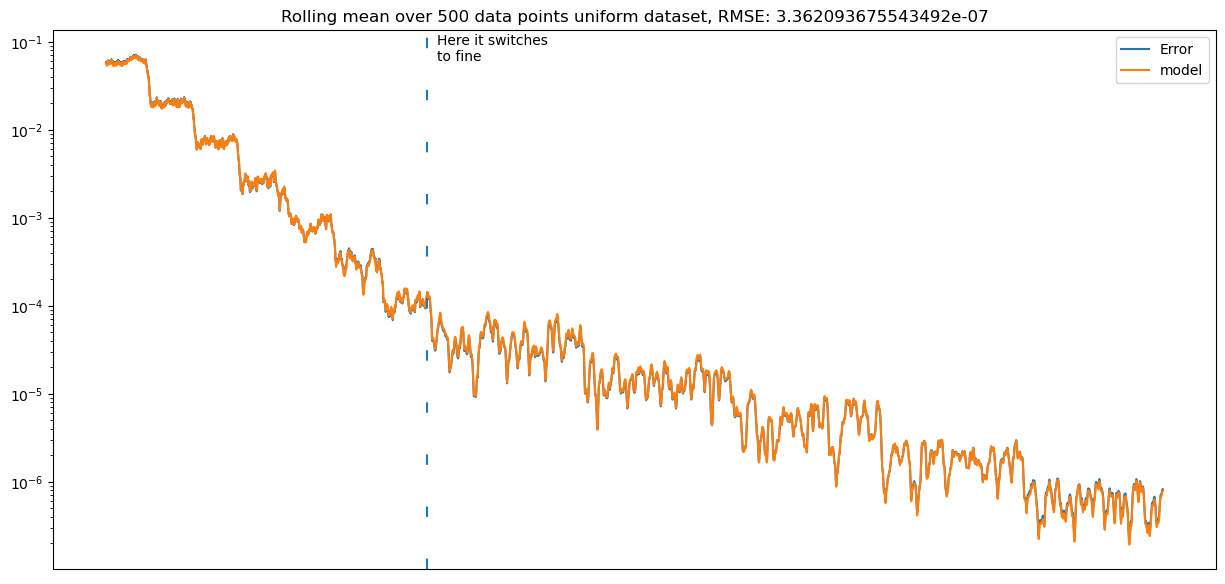

In [ ]:
plt.figure(figsize=(15, 7))
df.Error.rolling(500).mean().plot(logy=True)
df.model.rolling(500).mean().plot(logy=True)
plt.axvline(len(df_coarse), ls='--', dashes=(5, 20))
plt.text(len(df_coarse) + 1e3, 0.06, "Here it switches \nto fine")
plt.legend()
plt.xticks([])
plt.title(f"Rolling mean over 500 data points uniform dataset, RMSE: {mean_squared_error(df.Error, df.model)}")


([], [])

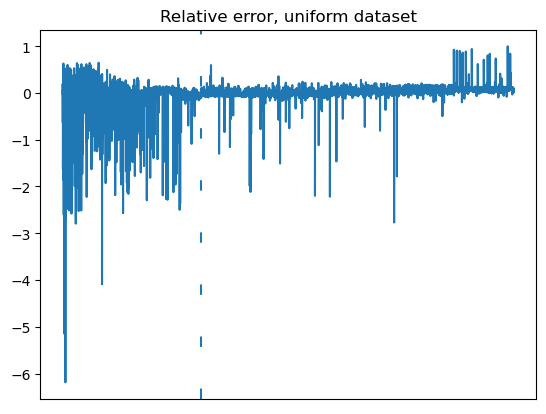

In [ ]:
df['Difference'] = (df.Error - df.model) / df.Error
plt.axvline(len(df_coarse), ls='--', dashes=(5, 20))
df.iloc[:, -1].plot()
plt.title("Relative error, uniform dataset")
plt.xticks([])

In [ ]:
# Non Uniform
df_coarse = pd.read_csv('Evaluate_NN/Coarse_factor_test.csv', header = None)
df_fine = pd.read_csv('Evaluate_NN/Fine_factor_test_base20_test.csv', header = None)
df_coarse.rename(columns={df_coarse.columns.values[-1]: "Error"}, inplace=True)
df_fine.rename(columns={df_fine.columns.values[-1]: "Error"}, inplace=True)
df_coarse['model'] = np.loadtxt('Evaluate_NN/Coarse_factor_test_model.csv', delimiter=',')
df_fine['model'] = np.loadtxt('Evaluate_NN/Fine_factor_test_base20_test_model.csv', delimiter=',')
df= pd.concat([df_coarse, df_fine], ignore_index=True)

In [ ]:
# Rescale back
df.iloc[:, -2:] = np.exp(df.iloc[:, -2:])

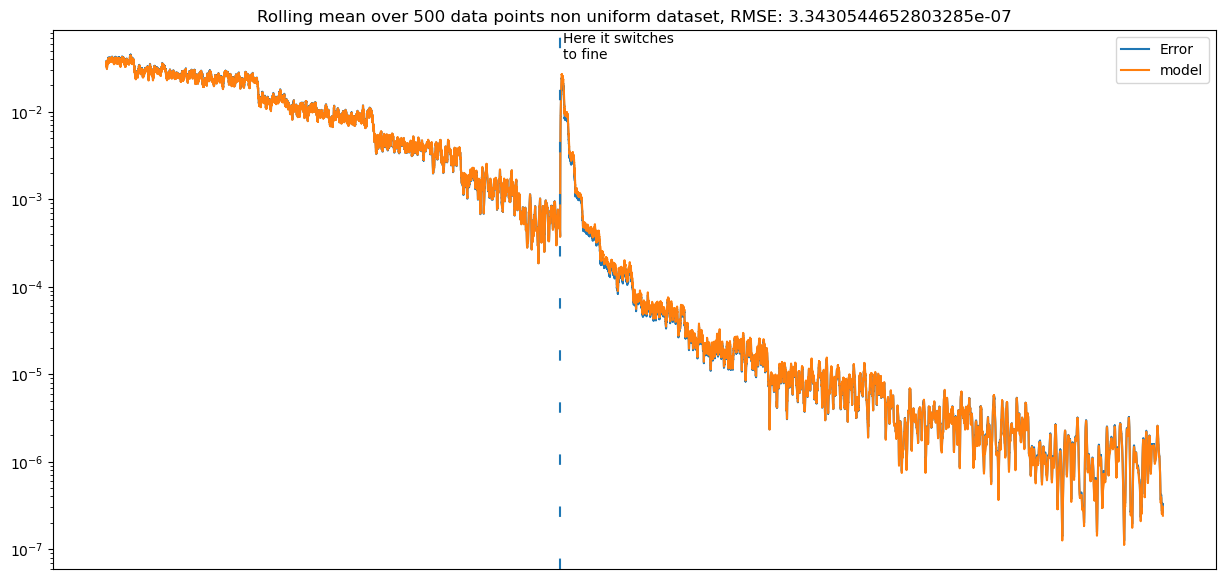

In [ ]:
plt.figure(figsize=(15, 7))
df.Error.rolling(500).mean().plot(logy=True)
df.model.rolling(500).mean().plot(logy=True)
plt.axvline(len(df_coarse), ls='--', dashes=(5, 20))
plt.text(len(df_coarse) + 1e3, 0.04, "Here it switches \nto fine")
plt.legend()
plt.xticks([])
plt.title(f"Rolling mean over 500 data points non uniform dataset, RMSE: {mean_squared_error(df.Error, df.model)}")


([], [])

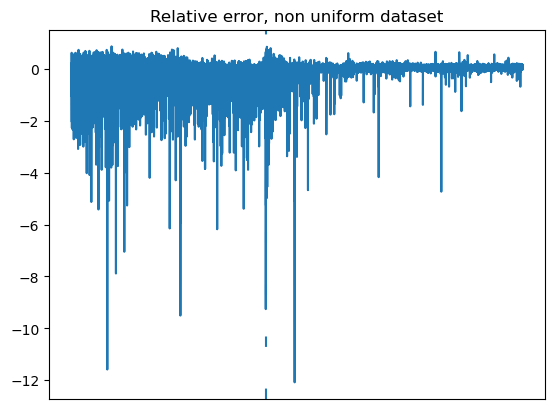

In [ ]:
df['Difference'] = (df.Error - df.model) / df.Error
plt.axvline(len(df_coarse), ls='--', dashes=(5, 20))
df.iloc[:, -1].plot()
plt.title("Relative error, non uniform dataset")
plt.xticks([])